In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans

In [2]:
pow_mins = pd.read_csv("/home/nils/projects/research_project_frequency_analysis/data/power-temprature-1Min.csv")
pow_mins["readable_date"] = pd.to_datetime(pow_mins["Date"], unit="s")
pow_mins

Unnamed: 0        Date  power  cpu0.power  cpu1.power  \
0               0  1488322857    273          97          90   
1               1  1488322916    272          96          91   
2               2  1488322975    274          98          92   
3               3  1488323034    273          97          91   
4               4  1488323093    273          97          91   
...           ...         ...    ...         ...         ...   
32472       32472  1490997278    318         118         111   
32473       32473  1490997340    318         116         110   
32474       32474  1490997399    317         116         110   
32475       32475  1490997458    316         117         111   
32476       32476  1490997578    317         117         110   

       cpu0.temperature  cpu1.temperature  sensor1.temperature  \
0                    70                65                   60   
1                    70                65                   60   
2                    69                65                   60   
3                    70                65                   60   
4                    69                65                   60   
...                 ...               ...                  ...   
32472                75                71                   63   
32473                75                71                   63   
32474                75                71                   63   
32475                75                71                   63   
32476                75                71                   63   

       sensor2.temperature       readable_date  
0                       57 2017-02-28 23:00:57  
1                       57 2017-02-28 23:01:56  
2                       57 2017-02-28 23:02:55  
3                       57 2017-02-28 23:03:54  
4                       57 2017-02-28 23:04:53  
...                    ...                 ...  
32472                   60 2017-03-31 21:54:38  
32473                   60 2017-03-31 21:55:40  
32474                   60 2017-03-31 21:56:39  
32475                   60 2017-03-31 21:57:38  
32476                   60 2017-03-31 21:59:38  

[32477 rows x 10 columns]

In [3]:
rel_cols = ["power", "cpu0.power", "cpu1.power", "cpu0.temperature", "cpu1.temperature", "sensor1.temperature", "sensor2.temperature"]

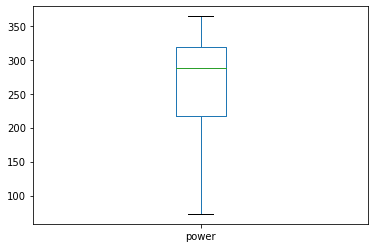

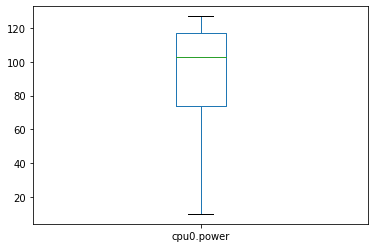

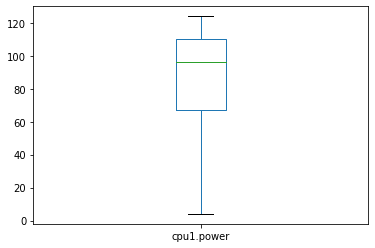

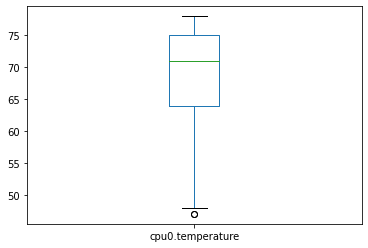

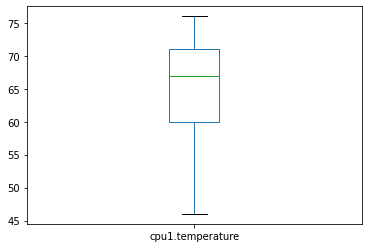

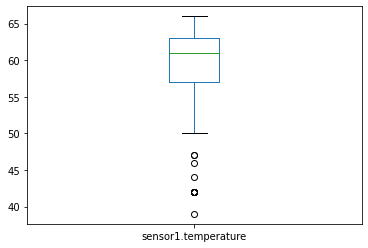

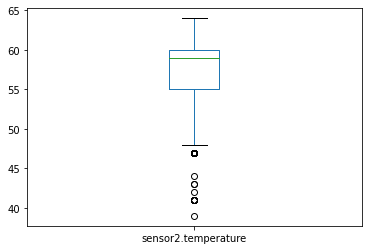

In [12]:
 for col in ["power", "cpu0.power", "cpu1.power", "cpu0.temperature", "cpu1.temperature", "sensor1.temperature", "sensor2.temperature"]:
    pow_mins[col].plot(kind = "box")
    plt.show()

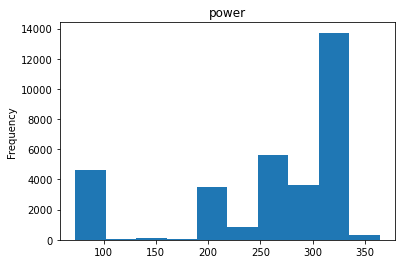

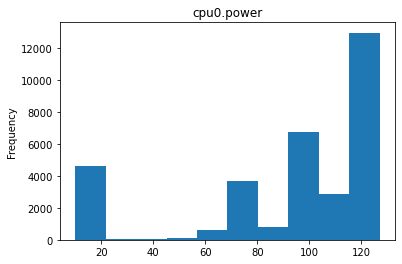

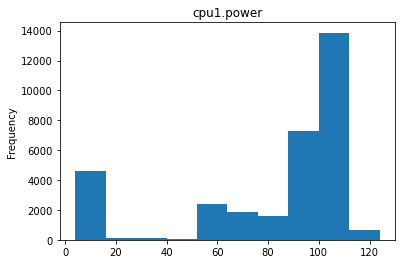

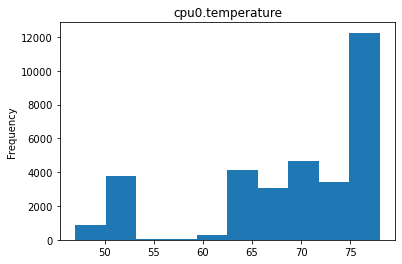

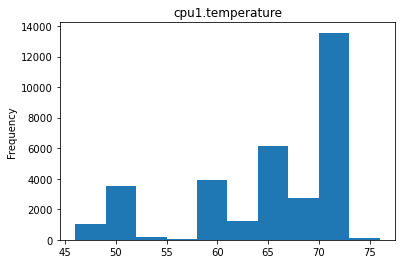

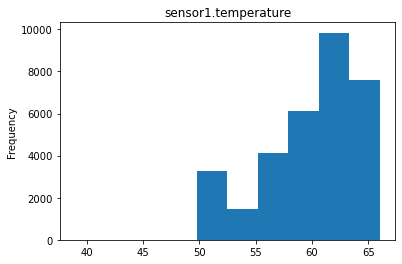

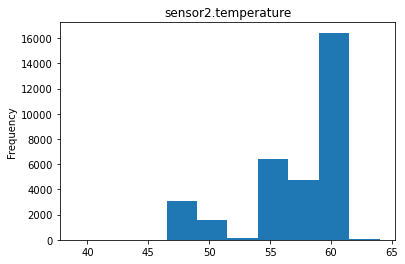

In [10]:
 for col in ["power", "cpu0.power", "cpu1.power", "cpu0.temperature", "cpu1.temperature", "sensor1.temperature", "sensor2.temperature"]:
    pow_mins[col].plot(kind = "hist")
    plt.title(col)
    plt.show()

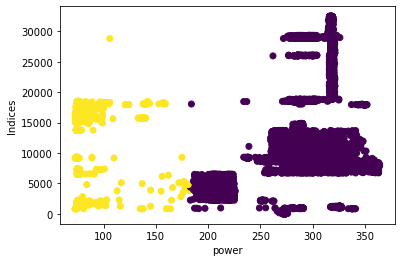

In [25]:
power_arr = pow_mins["power"].values.astype("double")
centroids, avg_dist = kmeans(power_arr,  2)
groups, cdist = vq.vq(power_arr, centroids)
plt.scatter(power_arr, np.arange(0, len(power_arr)), c=groups)
plt.xlabel("power")
plt.ylabel("Indices")
plt.show()

In [36]:
comb_arr = pow_mins[rel_cols].values.astype("double")
centroids, avg_dist = kmeans(comb_arr,  2)
groups, cdist = vq.vq(comb_arr, centroids)


array([17.40927221, 18.28277965, 15.65790717, ..., 35.29957203,
       35.25284768, 35.6766435 ])

In [254]:
comb_emb = TSNE(2).fit_transform(comb_arr)


In [4]:
known_issues = pd.read_csv("/home/nils/projects/research_project_frequency_analysis/data/TaurusMeta.csv")
known_issues.head()
start_date = pow_mins["Date"].iloc[0]
end_date = pow_mins["Date"].iloc[-1]
mask = (known_issues["start"] > start_date) & (known_issues["start"] < end_date)
issues_masked = known_issues[mask]
issues_masked

node       start          star_h         end            end_h  \
2  taurusi5314  1488397845  3/1/2017 20:50  1488404298   3/1/2017 22:38   
3  taurusi5314  1490083799  3/21/2017 9:09  1490097142  3/21/2017 12:52   

   old_counter  new_counter  duration  
2          560            2      6453  
3          252            2     13343

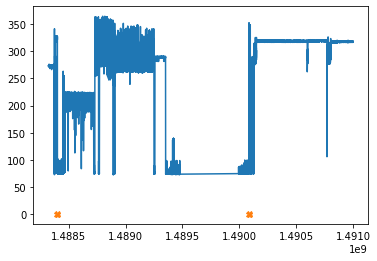

In [5]:
# Explorative analysis
plt.plot(pow_mins["Date"], pow_mins["power"])
plt.plot(issues_masked["start"], np.ones(len(issues_masked["start"])), linestyle="none", marker="X")
plt.show()

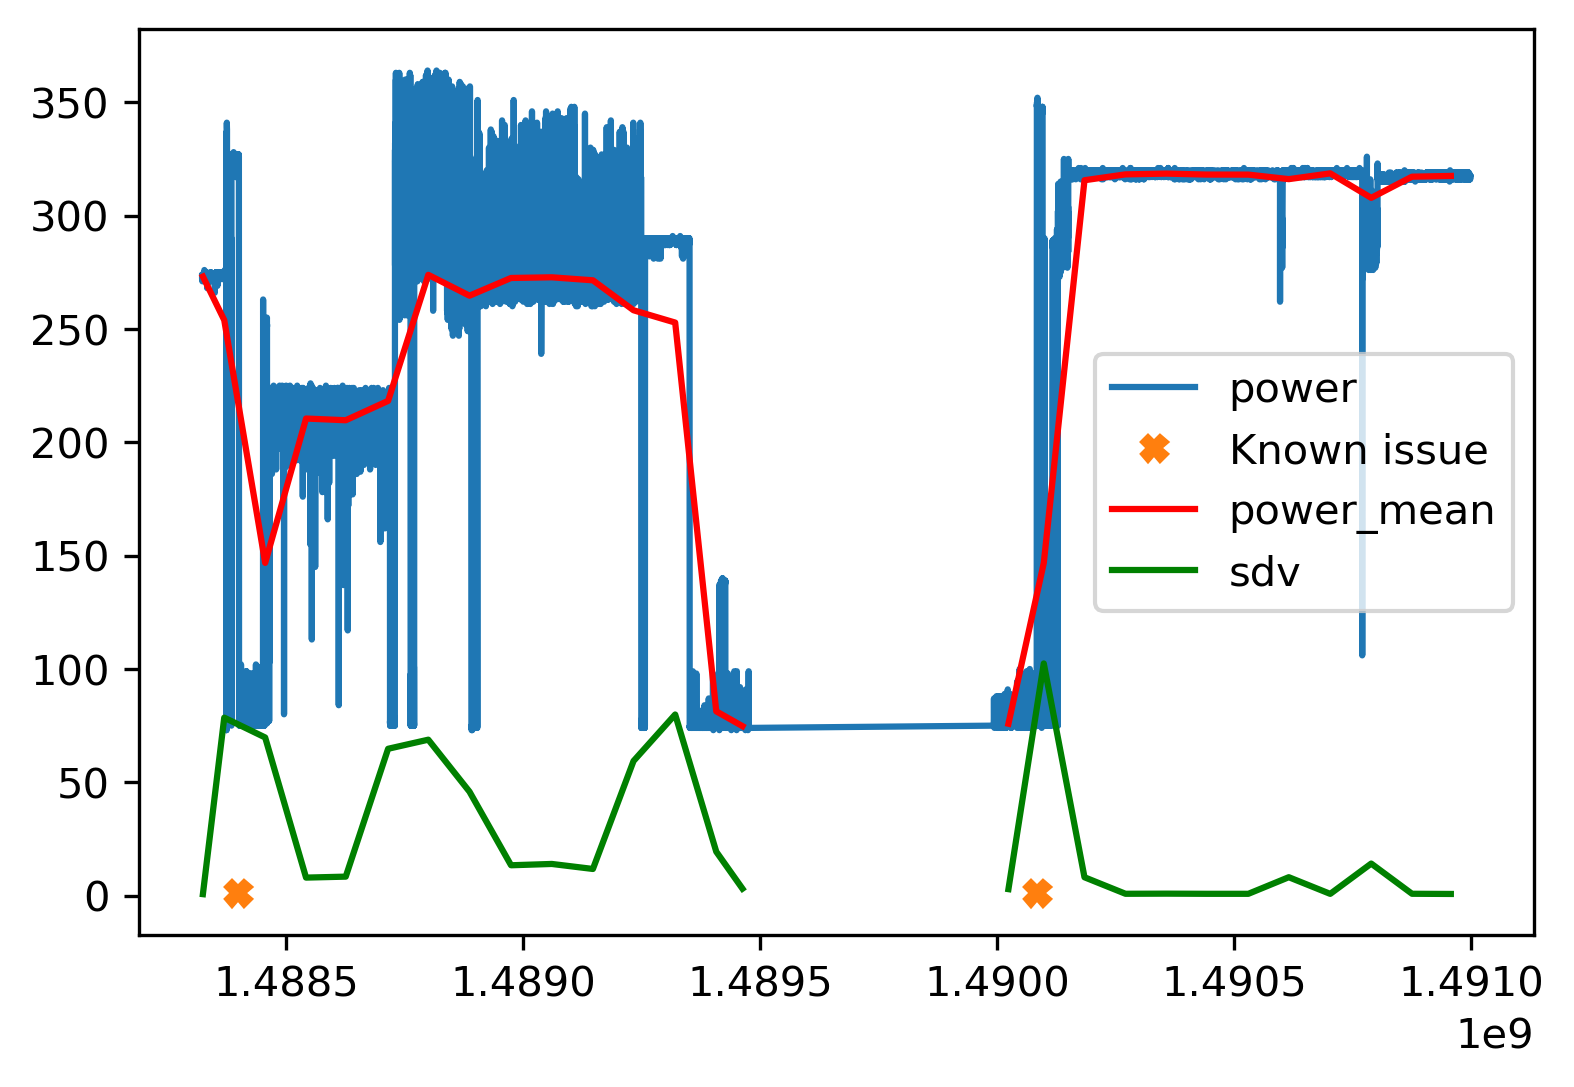

In [7]:
pow_mins.index = pow_mins["readable_date"]
roll_mean = pow_mins.resample("1d").mean()
roll_sdv = pow_mins.resample("1d").std()
roll_sdv.Date = roll_mean.Date
plt.figure(dpi=300)
plt.plot(pow_mins["Date"], pow_mins["power"], label="power")
plt.plot(issues_masked["start"], np.ones(len(issues_masked["start"])), linestyle="none", marker="X", label="Known issue")
plt.plot(roll_mean["Date"], roll_mean["power"], c="red", label="power_mean")
plt.plot(roll_mean["Date"], roll_sdv["power"], c="green", label="sdv")
plt.legend()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

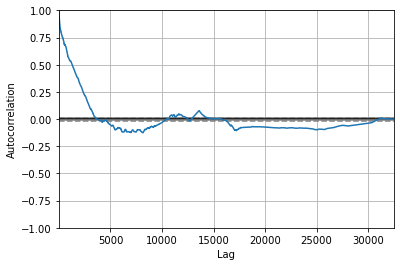

In [188]:
pd.plotting.autocorrelation_plot(pow_mins.power)
# Only correlated to nearby values, otherwise mostly uncorrelated -> no periodicity 

(146.3, 388.7)

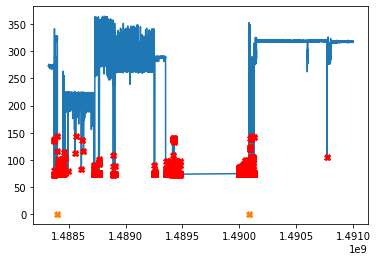

In [216]:
# IQR
pow_mins["emb_1"] = comb_emb[:, 0]
pow_mins["emb_2"] = comb_emb[:, 1]

q1, q3 = pow_mins["power"].quantile([0.25, 0.75])
irq = q3 - q1

lb = q1 - (0.7 * irq)
ub = q3 + (0.7 * irq)

pow_mins["iqr_power"] = ((pow_mins["power"] > ub) | (pow_mins["power"] < lb))
iqr_anom = pow_mins[pow_mins["iqr_power"]]

plt.plot(pow_mins["Date"], pow_mins["power"], label="power")
plt.plot(issues_masked["start"], np.ones(len(issues_masked["start"])), linestyle="none", marker="X", label="Known issue")
plt.plot(iqr_anom["Date"], iqr_anom["power"], linestyle="none", marker="X", c="red")

lb, ub
# NOt really telling a lot

(-25.026179032045448, 78.52030194713262)

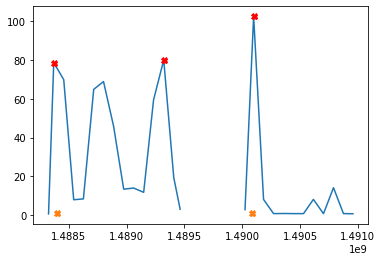

In [228]:
q1, q3 = roll_sdv["power"].quantile([0.25, 0.75])
irq = q3 - q1

lb = q1 - (0.5 * irq)
ub = q3 + (0.5 * irq)

roll_sdv["iqr_power"] = ((roll_sdv["power"] > ub) | (roll_sdv["power"] < lb))
iqr_anom = roll_sdv[roll_sdv["iqr_power"]]

plt.plot(roll_mean["Date"], roll_sdv["power"], label="power")
plt.plot(issues_masked["start"], np.ones(len(issues_masked["start"])), linestyle="none", marker="X", label="Known issue")
plt.plot(iqr_anom["Date"], iqr_anom["power"], linestyle="none", marker="X", c="red")

lb, ub
# Might be useful

In [232]:
emb_df = pow_mins[["emb_1", "emb_2"]]
emb_df

emb_1      emb_2
readable_date                            
2017-02-28 23:00:57  -9.251247  36.785027
2017-02-28 23:01:56 -15.601948  39.878105
2017-02-28 23:02:55  -2.708586  38.727859
2017-02-28 23:03:54  -9.211073  36.834938
2017-02-28 23:04:53 -10.655122  37.474182
...                        ...        ...
2017-03-31 21:54:38  55.556622  26.301716
2017-03-31 21:55:40  22.598410  34.300114
2017-03-31 21:56:39  12.692245 -42.982262
2017-03-31 21:57:38   8.505039  34.097122
2017-03-31 21:59:38  -7.930767  63.431236

[32477 rows x 2 columns]

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(emb_df.values)
labels = kmeans.predict(emb_df.values)
uniq_e, count_e = np.unique(labels, True)
clusters = np.asarray((uniq_e, count_e))
clusters

def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

outliers_fraction = 0.13
distance = getDistanceByPoint(emb_df, kmeans)

n_outliers = int(outliers_fraction * len(distance))
threshold = distance.nlargest(n_outliers).min()

emb_df["anomaly"] = (distance >= threshold).astype(int)

NameError: name 'emb_df' is not defined

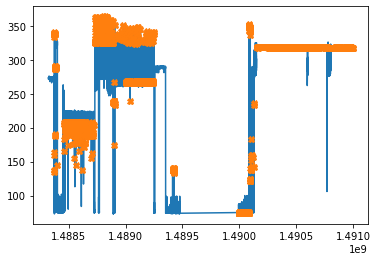

In [253]:
plt.plot(pow_mins.Date, pow_mins["power"])
anomly_vals = pow_mins[emb_df.anomaly == 1]
plt.plot(anomly_vals.Date, anomly_vals.power, linestyle="none", marker="X")

#largest embedded cluster distances
